<a href="https://colab.research.google.com/github/wooallkey/hello-world/blob/master/tf_keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  from google.colab import drive
  %tensorflow_version 2.x
  print("Note: using Google CoLab")
except:
  print("Note: not using Google CoLab")
  COLAB = False

Note: using Google CoLab


测试是否运行在colab上

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sys
import os
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version)
for module in np,pd,mpl,sklearn,tf,keras:
  print(module.__name__,module.__version__)

2.2.0-rc2
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy 1.18.2
pandas 1.0.3
matplotlib 3.2.1
sklearn 0.22.2.post1
tensorflow 2.2.0-rc2
tensorflow.keras 2.3.0-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_vaild,x_train = x_train_all[:5000],x_train_all[5000:]
y_vaild,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_vaild.shape,y_vaild.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


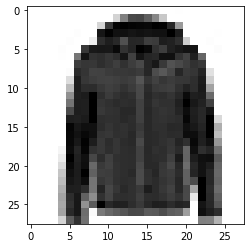

In [0]:
def show_single_image(img_arr):
  plt.imshow(img_arr,cmap='binary')
  plt.show()

show_single_image(x_train[0])

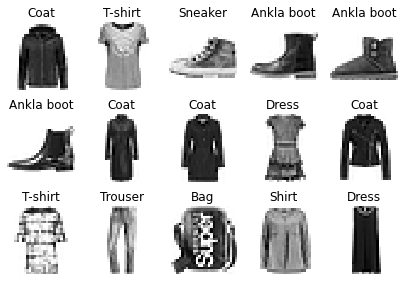

In [0]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_name):
  assert len(x_data) == len(y_data)
  assert n_rows * n_cols < len(x_data)
  plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
  for row in range(n_rows):
    for cols in range(n_cols):
      index = cols + row * n_cols
      plt.subplot(n_rows,n_cols,index+1)
      plt.imshow(x_data[index],cmap='binary',
            interpolation="nearest")
      plt.axis("off")
      plt.title(class_name[y_data[index]])
  plt.show()

class_name = ["T-shirt","Trouser","Pullover","Dress",
        "Coat","Sandal","Shirt","Sneaker",
        "Bag","Ankla boot"]
show_imgs(3,5,x_train,y_train,class_name)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
       optimizer="sgd",
       metrics=["accuracy"])

In [0]:
history = model.fit(x_train,y_train,epochs=10,
           validation_data=(x_vaild,y_vaild))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 18026267651604480.0000 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3028

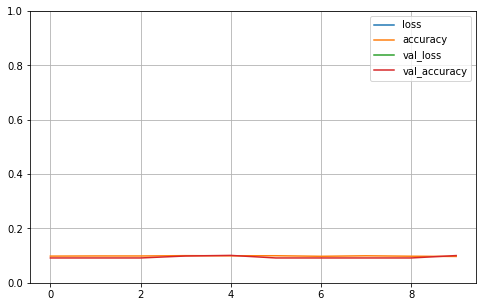

In [0]:
def plot_learning_curvers(history):
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

plot_learning_curvers(history)

In [0]:
model2 = keras.models.Sequential([
     keras.layers.Flatten(input_shape=[28,28],
     keras.layers.Dense(300,activation="relu"),
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dense(10,activation="softmax")                                 
])

model2.compile(loss="sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics=["accuracy"])

In [0]:
history = model2.fit(x_train,y_train,epochs=10,
            validation_data=(x_vaild,y_vaild))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 2.8877 - accuracy: 0.7538 - val_loss: 0.7045 - val_accuracy: 0.8046
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5539 - accuracy: 0.8168 - val_loss: 0.4892 - val_accuracy: 0.8362
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4638 - accuracy: 0.8366 - val_loss: 0.4541 - val_accuracy: 0.8472
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4427 - accuracy: 0.8451 - val_loss: 0.4341 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4247 - accuracy: 0.8495 - val_loss: 0.4018 - val_accuracy: 0.8580
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8581 - val_loss: 0.4836 - val_accuracy: 0.8342
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3860 - accuracy: 0.8640 - val_loss: 0.4774 - val_accuracy:

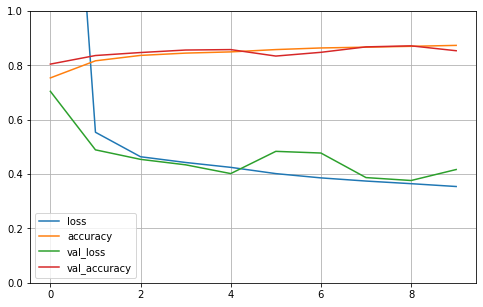

In [0]:
plot_learning_curvers(history)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_vaild_scaler = scaler.transform(x_vaild.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [0]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")                                 
])

model3.compile(loss="sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics=["accuracy"])

In [23]:
history = model3.fit(x_train_scaler,y_train,epochs=10,
            validation_data=(x_vaild_scaler,y_vaild))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4605 - accuracy: 0.8309 - val_loss: 0.3599 - val_accuracy: 0.8718
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3528 - accuracy: 0.8696 - val_loss: 0.3524 - val_accuracy: 0.8700
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3179 - accuracy: 0.8809 - val_loss: 0.3210 - val_accuracy: 0.8826
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.8911 - val_loss: 0.3339 - val_accuracy: 0.8806
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2742 - accuracy: 0.8977 - val_loss: 0.3438 - val_accuracy: 0.8752
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2594 - accuracy: 0.9027 - val_loss: 0.3091 - val_accuracy: 0.8872
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2444 - accuracy: 0.9073 - val_loss: 0.3082 - val_accuracy:

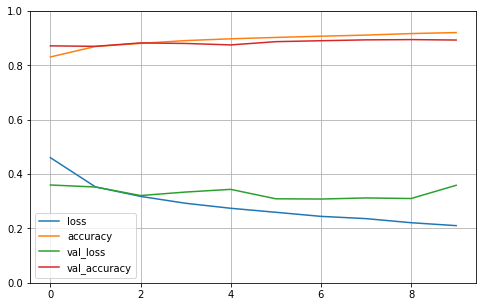

In [24]:
plot_learning_curvers(history)

In [25]:
model3.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.8778


[0.3736780881881714, 0.8777999877929688]